170498071/170498071 [==============================] - 11s 0us/step


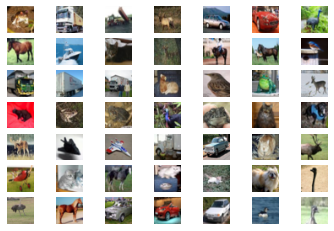

In [ ]:
#plot of 25 images from the MNIST training dataset, arranged in a 5×5 square.


from keras.datasets.cifar10 import load_data
from matplotlib import pyplot
# load the images into memory
(trainX, trainy), (testX, testy) = load_data()
# plot images from the training dataset
for i in range(49):
	# define subplot
	pyplot.subplot(7, 7, 1 + i)
	# turn off axis
	pyplot.axis('off')
	# plot raw pixel data
	pyplot.imshow(trainX[i], cmap='gray_r')
pyplot.show()

In [ ]:
# summarize the shape of the dataset
print('Train', trainX.shape, trainy.shape)
print('Test', testX.shape, testy.shape)

Train (50000, 32, 32, 3) (50000, 1)
Test (10000, 32, 32, 3) (10000, 1)


In [ ]:
from keras.models import Sequential
from keras.optimizers import Adam
from keras.layers import Conv2D, Flatten, Dense, Dropout, LeakyReLU
from keras.utils.vis_utils import plot_model
import numpy as np

In [ ]:
# define the standalone discriminator model

def define_discriminator(in_shape=(32,32,3)):
  model = Sequential()
  # normal
  model.add(Conv2D(64, (3,3),padding ='same',input_shape=in_shape))
  model.add(LeakyReLU(alpha=0.2))
  # downsample
  model.add(Conv2D(128, (3,3),strides = (2,2),padding ='same'))
  model.add(LeakyReLU(alpha=0.2))
  # downsample
  model.add(Conv2D(128, (3,3),strides = (2,2),padding ='same'))
  model.add(LeakyReLU(alpha=0.2))
  # downsample
  model.add(Conv2D(256, (3,3),strides = (2,2),padding ='same'))
  model.add(LeakyReLU(alpha=0.2))
  # classifier
  model.add(Flatten())
  model.add(Dropout(0.4))
  model.add(Dense(1,activation='sigmoid'))
  # complile model
  opt = Adam(lr=0.0002,beta_1=0.5)
  model.compile(loss='binary_crossentropy',optimizer=opt,metrics=['accuracy'])
  return model



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 64)        1792      
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 32, 32, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 128)       73856     
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 16, 16, 128)       0         
                                                                 
 conv2d_2 (Conv2D)           (None, 8, 8, 128)         147584    
                                                                 
 leaky_re_lu_2 (LeakyReLU)   (None, 8, 8, 128)         0         
                                                                 
 conv2d_3 (Conv2D)           (None, 4, 4, 256)         2

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


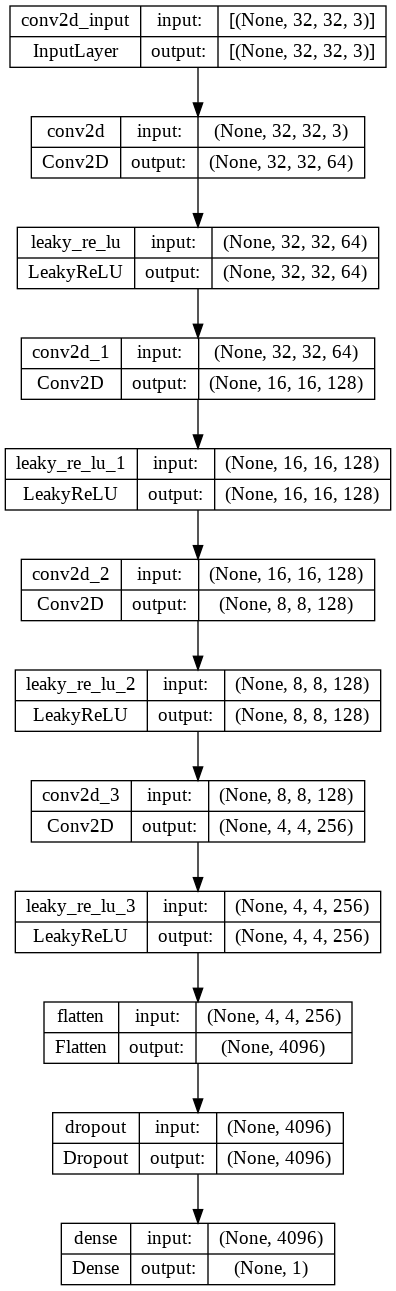

In [ ]:
# define model
model = define_discriminator()
#summarize model
model.summary()
#plot the model
plot_model(model,to_file='discriminator_plot.png',show_shapes=True,show_layer_names=True)

In [ ]:
trainX.shape

(50000, 32, 32, 3)

In [ ]:
#function to load the dataset andd scale it
#load and prepare cifar10 images

def load_real_samples():
  #load cifar10 dataset
  (trainX, _),(_, _) = load_data()
  #convert from unsigned ints to float
  X= trainX.astype('float32')
  #scale from [0,255] to [-1,1]
  X = (X - 127.5) / 127.5
  return X


In [ ]:
X = load_real_samples()
print(X.shape)
print(X[0])

(50000, 32, 32, 3)
[[[-0.5372549  -0.5137255  -0.5058824 ]
  [-0.6627451  -0.6392157  -0.64705884]
  [-0.60784316 -0.62352943 -0.6627451 ]
  ...
  [ 0.23921569  0.03529412 -0.15294118]
  [ 0.19215687 -0.01960784 -0.2       ]
  [ 0.16078432 -0.02745098 -0.19215687]]

 [[-0.8745098  -0.84313726 -0.84313726]
  [-1.         -1.         -1.        ]
  [-0.85882354 -0.9372549  -1.        ]
  ...
  [-0.03529412 -0.30980393 -0.5686275 ]
  [-0.06666667 -0.34901962 -0.60784316]
  [-0.04313726 -0.31764707 -0.5529412 ]]

 [[-0.8039216  -0.8117647  -0.8352941 ]
  [-0.8745098  -0.94509804 -1.        ]
  [-0.6156863  -0.7882353  -0.9372549 ]
  ...
  [-0.07450981 -0.34117648 -0.60784316]
  [-0.05882353 -0.34117648 -0.60784316]
  [-0.14509805 -0.42745098 -0.67058825]]

 ...

 [[ 0.6313726   0.33333334 -0.24705882]
  [ 0.5764706   0.2        -0.73333335]
  [ 0.5529412   0.2627451  -0.79607844]
  ...
  [ 0.25490198  0.04313726 -0.4509804 ]
  [-0.56078434 -0.75686276 -0.94509804]
  [-0.58431375 -0.7333333

In [ ]:
# select real samples
def generate_real_samples(dataset,n_samples):
  # choose random instances
  ix = np.random.randint(0,dataset.shape[0],n_samples)
  # retrieve selected images
  X = dataset[ix]
  # genereate real class labels (1)
  y = np.ones((n_samples,1))
  return X,y

In [ ]:
X,y = generate_real_samples(X,64)
print(X.shape)
print(y.shape)
print(y)


(64, 32, 32, 3)
(64, 1)
[[1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]]


In [ ]:
# generate n fake samples with class labels
def generate_fake_samples(n_samples):
  # generate uniform random numbers in [0,1]
  X = np.random.rand(32 * 32 * 3 * n_samples)
  # update to have the range [-1,1]
  X = -1 + X * 2
  # reshape into a batch of color images
  X = X.reshape((n_samples, 32, 32, 3))
  # generate fake class labels (0)
  y = np.zeros((n_samples,1))
  return X, y



In [ ]:
X,y = generate_fake_samples(64)
print(X.shape)
print(y.shape)
print(y)

(64, 32, 32, 3)
(64, 1)
[[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]]


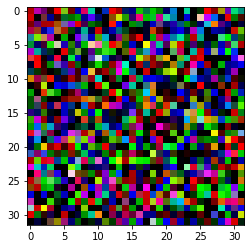

In [ ]:
pyplot.imshow(X[0])

In [ ]:
# train the discriminator model temporarily
def train_discriminator(model,dataset,n_iter=20,n_batch=128):
  half_batch = int(n_batch/2)
  # manually enumerate epochs
  for i in range(n_iter):
    # get randomly selected real samples
    X_real, y_real = generate_real_samples(dataset,half_batch)
    # update discriminator on real samples
    _, real_acc = model.train_on_batch(X_real,y_real)
    # generate fake samples
    X_fake, y_fake = generate_fake_samples(half_batch)
    # update discriminator on fake samples
    _, fake_acc = model.train_on_batch(X_fake,y_fake)
    # summarize the performance
    print('>%d real=%.0f%% fake=%.0f%%' % (i+1, real_acc * 100, fake_acc * 100))


In [ ]:
# Example training

# define the discriminator model
model = define_discriminator()
# load image data
dataset = load_real_samples()
# fit the model
train_discriminator(model, dataset)

>1 real=81% fake=3%
>2 real=100% fake=0%
>3 real=100% fake=8%
>4 real=98% fake=22%
>5 real=97% fake=52%
>6 real=100% fake=86%
>7 real=97% fake=100%
>8 real=100% fake=100%
>9 real=97% fake=100%
>10 real=100% fake=100%
>11 real=98% fake=100%
>12 real=100% fake=100%
>13 real=98% fake=100%
>14 real=100% fake=100%
>15 real=100% fake=100%
>16 real=100% fake=100%
>17 real=100% fake=100%
>18 real=100% fake=100%
>19 real=100% fake=100%
>20 real=100% fake=100%


In [ ]:
from keras.models import Sequential
from keras.layers import Dense,Reshape,Conv2D,Conv2DTranspose,LeakyReLU
from keras.utils.vis_utils import plot_model

In [ ]:
# define the standalone generator model

def define_generator(latent_dim):
  model = Sequential()
  #foundation for 4*4 image
  n_nodes = 256 * 4 * 4
  model.add(Dense(n_nodes, input_dim=latent_dim))
  model.add(LeakyReLU(alpha=0.2))
  model.add(Reshape((4,4,256)))
  # upsample to 8*8
  model.add(Conv2DTranspose(128,(4,4),strides = (2,2), padding = 'same'))
  model.add(LeakyReLU(alpha=0.2))
  # upsample to 16*16
  model.add(Conv2DTranspose(128,(4,4),strides = (2,2), padding = 'same'))
  model.add(LeakyReLU(alpha=0.2))
  # upsample to 32*32
  model.add(Conv2DTranspose(128,(4,4),strides = (2,2), padding = 'same'))
  model.add(LeakyReLU(alpha=0.2))
  # output layer
  model.add(Conv2D(3,(3,3),activation='tanh',padding = 'same'))
  return model


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 4096)              413696    
                                                                 
 leaky_re_lu_8 (LeakyReLU)   (None, 4096)              0         
                                                                 
 reshape (Reshape)           (None, 4, 4, 256)         0         
                                                                 
 conv2d_transpose (Conv2DTra  (None, 8, 8, 128)        524416    
 nspose)                                                         
                                                                 
 leaky_re_lu_9 (LeakyReLU)   (None, 8, 8, 128)         0         
                                                                 
 conv2d_transpose_1 (Conv2DT  (None, 16, 16, 128)      262272    
 ranspose)                                            

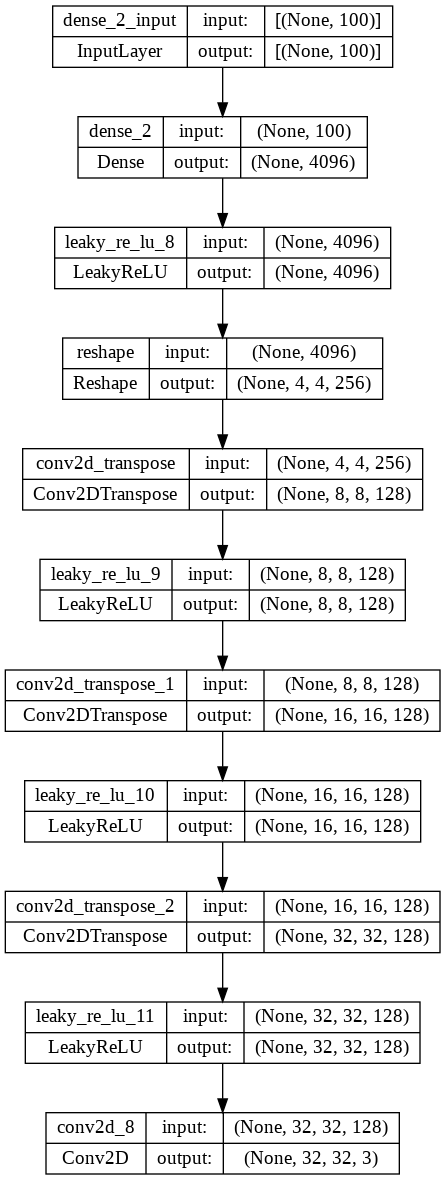

In [ ]:
# define the size of the latent space
latent_dim = 100
# define the generator model
model = define_generator(latent_dim)
# summarize the model
model.summary()
# plot the model
plot_model(model, to_file = 'generator_plot.png',show_shapes = True,show_layer_names = True)

In [ ]:
# generate point in latent space as input for the generator
def generate_latent_points(latent_dim,n_samples):
  # generate points in latent space
  x_input = np.random.randn(latent_dim * n_samples)
  # reshape into a batch inputs for the network
  x_input = x_input.reshape(n_samples,latent_dim)
  return x_input

In [ ]:
x_input = generate_latent_points(100,64)
print(x_input.shape)

(64, 100)


In [ ]:
# use the generator to generate n fake samples, with fake labels
def generate_fake_samples(g_model,latent_dim, n_samples):
  # generate points in latent space
  x_input = generate_latent_points(latent_dim, n_samples)
  # predict outputs
  X = g_model.predict(x_input)
  # create fake class labels (0)
  y = np.zeros((n_samples,1))
  return X,y


2/2 [==============================] - 1s 152ms/step


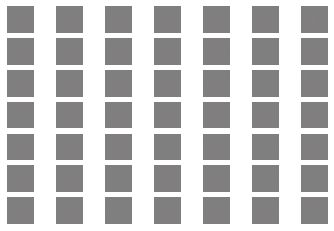

In [ ]:
# size of the latent space
latent_dim = 100
# define the discriminator model
model = define_generator(latent_dim)
# generate samples
n_samples = 49
X, _ = generate_fake_samples(model,latent_dim, n_samples)
# scale pixel values from [-1,1] to [0,1]
X = (X+1)/2
# plot the generated samples
for i in range(n_samples):
  # define subplot
  pyplot.subplot(7,7, 1+i)
  # turn off axis labels
  pyplot.axis('off')
  # plot single image
  pyplot.imshow(X[i])
  # show the figure
pyplot.show()

In [ ]:
# define the combine generator and discriminator model, for updating the generator

def define_gan(g_model,d_model):
  # make weights in the discriminator not trainable
  d_model.trainable = False
  # connect them
  model = Sequential()
  # add generator
  model.add(g_model)
  # add the discriminator
  model.add(d_model)
  # compile the model
  opt = Adam(lr = 0.0002, beta_1 = 0.5)
  model.compile(loss = 'binary_crossentropy',optimizer = opt)
  return model

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_5 (Sequential)   (None, 32, 32, 3)         1466115   
                                                                 
 sequential_4 (Sequential)   (None, 1)                 522497    
                                                                 
Total params: 1,988,612
Trainable params: 1,466,115
Non-trainable params: 522,497
_________________________________________________________________


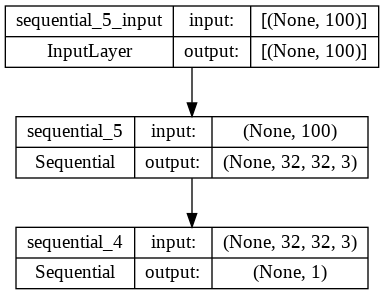

In [ ]:
# size of the latent space
latent_dim = 100
# create the discriminator
d_model = define_discriminator()
# create the generator
g_model = define_generator(latent_dim)
# create the gan
gan_model = define_gan(g_model,d_model)
# summarize gan model
gan_model.summary()
# plot gan model
plot_model(gan_model,to_file='gan_plot.png',show_shapes=True,show_layer_names=True)

In [ ]:
# train the generator and discriminator
def train(g_model,d_model,gan_model,dataset,latent_dim,n_epochs=200,n_batch=128):
  batch_per_epoch = int(dataset.shape[0] / n_batch)
  half_batch = int(n_batch/2)
  # manually enumerate epochs
  for i in range(n_epochs):
    # enumerate batches over the training set
    for j in range(batch_per_epoch):
      # generate randomly selected real samples
      X_real,y_real = generate_real_samples(dataset,half_batch)
      # update discriminator model weights
      d_loss1, _ = d_model.train_on_batch(X_real,y_real)
      # generate fake samples
      X_fake,y_fake = generate_fake_samples(g_model,latent_dim,half_batch)
      # update discriminator model weights
      d_loss2, _ = d_model.train_on_batch(X_fake,y_fake)
      # prepare points in latent space as input for the generator
      X_gan = generate_latent_points(latent_dim,n_batch)
      # create inverted labels for the fake samples
      y_gan = np.ones((n_batch,1))
      # update the generator via the discriminator's error
      g_loss = gan_model.train_on_batch(X_gan,y_gan)
      # summarize loss on this batch
      print('>%d %d/%d, d1=%.3f, d2=%.3f g=%.3f'% (i+1,j+1,batch_per_epoch,d_loss1,d_loss2,g_loss))
      # evaluate the model performance, sometimes
      if (i+1) % 10 ==0:
        summarize_performance(i,g_model,d_model,dataset,latent_dim)

In [ ]:
# evaluate the discriminator, plot generated images, save generator model

def summarize_performance(epoch,g_model,d_model,dataset,latent_dim,n_samples=150):
  # prepare real samples
  X_real,y_real = generate_real_samples(dataset,n_samples)
  # evaluate discriminator on real examples
  _,acc_real = d_model.evaluate(X_real,y_real,verbose=0)
  # prepare fake examples
  x_fake,y_fake = generate_fake_samples(g_model,latent_dim,n_samples)
  # evaluate discriminator on fake example
  _,acc_fake = d_model.evaluate(x_fake,y_fake,verbose=0)
  # summarize discriminator performance
  print('>Accuracy real: %.0f%%, fake: %.0f%%'% (acc_real * 100,acc_fake * 100))
  # save plot
  save_plot(x_fake,epoch)
  # save the generator tile file
  filename = 'generator_model_%03d.h5' % (epoch+1)
  g_model.save(filename)

In [ ]:
# craete and save a plot of generated images
def save_plot(example,epoch,n=7):
  # scale from [-1,1] to [0,1]
  example = (example + 1) / 2.0
  # plot images
  for i in range(n * n):
    # define subplot
    pyplot.subplot(n,n, 1 + i)
    # turn off axis
    pyplot.axis('off')
    # plot new pixel data
    pyplot.imshow(example[i])
  # save plot to file
  filename='generated_plot_e%03d.png' % (epochs+1)
  pyplot.savefig(filename)
  pyplot.close()



In [ ]:
train(g_model,d_model,gan_model,dataset,latent_dim,n_epochs=200,n_batch=128)

2/2 [==============================] - 1s 267ms/step
>1 1/390, d1=0.599, d2=0.700 g=0.687
2/2 [==============================] - 1s 278ms/step
>1 2/390, d1=0.523, d2=0.710 g=0.678
2/2 [==============================] - 1s 270ms/step
>1 3/390, d1=0.420, d2=0.732 g=0.657
2/2 [==============================] - 1s 280ms/step
>1 4/390, d1=0.317, d2=0.781 g=0.623
2/2 [==============================] - 1s 270ms/step
>1 5/390, d1=0.220, d2=0.861 g=0.583
2/2 [==============================] - 1s 285ms/step
>1 6/390, d1=0.180, d2=0.939 g=0.568
2/2 [==============================] - 1s 293ms/step
>1 7/390, d1=0.148, d2=0.925 g=0.614
2/2 [==============================] - 1s 286ms/step
>1 8/390, d1=0.152, d2=0.801 g=0.737
2/2 [==============================] - 1s 284ms/step
>1 9/390, d1=0.157, d2=0.623 g=0.911
2/2 [==============================] - 1s 276ms/step
>1 10/390, d1=0.203, d2=0.528 g=1.023
2/2 [==============================] - 1s 277ms/step
>1 11/390, d1=0.148, d2=0.515 g=1.008
2/2 [===

KeyboardInterrupt: ignored